<a href="https://colab.research.google.com/github/Rosa-Ortega/Escencia_del_cliente/blob/main/Esencia_del_Cliente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Configuración del Ambiente

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import sys
import json
from sklearn.preprocessing import LabelEncoder
sys.path.append('/content/drive/MyDrive/')

#from drive.MyDrive.path.diccionarios import diccionario_ing_es  Ruta del archivo CSV en Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Obtención de los datos

In [34]:
df_media_prediction = pd.read_csv('/content/drive/MyDrive/Escencia_Cliente/media prediction and its cost.csv')
df_media_prediction.head()


,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [35]:
import drive.MyDrive.Escencia_Cliente.diccionarios as diccionarios

df =df_media_prediction.copy()

# Obtener el diccionario de mapeo de columnas
column_mappings = diccionarios.columnas

# Mapeo de la columna media_prediction
df['food_category'] = df['food_category'].map(diccionarios.categoria_alimento);
df['food_department'] = df['food_department'].map(diccionarios.departamento);
df['food_family'] = df['food_family'].map(diccionarios.tipo);
df['promotion_name'] = df['promotion_name'].map(diccionarios.promocion);
df['education'] = df['education'].map(diccionarios.escolaridad);
df['member_card'] = df['member_card'].map(diccionarios.miembro);
df['occupation'] = df['occupation'].map(diccionarios.ocupacion);
df['sales_country'] = df['sales_country'].map(diccionarios.pais);
df['marital_status'] = df['marital_status'].map(diccionarios.estado_civil);
df['gender'] = df['gender'].map(diccionarios.genero);
df['avg. yearly_income'] = df['avg. yearly_income'].map(diccionarios.ingreso_anual);
df['houseowner'] = df['houseowner'].map(diccionarios.vivienda_propia);
df['store_type'] = df['store_type'].map(diccionarios.comercio);
df['media_type'] = df['media_type'].map(diccionarios.divulgacion);

df = df.rename(columns=column_mappings)

pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
df.sample(10)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox),marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
11162,Productos lácteos,Productos lácteos,Comida,10.02,3.1062,3.0,Ahorros por montones,México,Casado,Femenino,2.0,Primaria,NaN,Obrero,Sí,2.0,20000,0.0,2.0,Gorilla,3.34,13.30,10.30,1.0,1.0,20.0,Supermercado,Orizaba,Veracruz,34791.0,26354.0,5062.0,3375.0,0.0,0.0,1.0,1.0,0.0,Anexo del producto,105.19
35371,Fruta,Productos enlatados,Comida,9.33,4.1985,3.0,Ahorro para apostadores grandes,Estados Unidos,Casado,Masculino,1.0,Primaria,NaN,Obrero,Sí,1.0,20000,0.0,1.0,Green Ribbon,3.11,17.50,15.50,1.0,0.0,5.0,Supermercado gourmet,Beverly Hills,CA,23688.0,15337.0,5011.0,3340.0,1.0,1.0,1.0,1.0,1.0,"Periódico dominical, radio, televisión",95.55
56044,Productos lácteos,Productos lácteos,Comida,10.64,5.2136,4.0,Ganadores de precios,México,Soltero,Masculino,4.0,Secundaria,Bronce,Técnico,Sí,2.0,40000,0.0,2.0,Gorilla,2.66,21.20,20.20,1.0,0.0,5.0,Supermercado de lujo,Merida,Yucatan,30797.0,20141.0,6393.0,4262.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio, televisión",83.55
15895,Bebidas carbonatadas,Bebidas,Bebida,7.41,2.5194,3.0,Ahorro para apostadores grandes,Estados Unidos,Casado,Femenino,2.0,Primaria,NaN,Técnico,Sí,1.0,20000,2.0,1.0,Fabulous,2.47,18.60,16.60,1.0,0.0,1.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3124,Vegetales,Productos frescos,Comida,11.20,4.7040,4.0,Duplica tus ahorros,Estados Unidos,Soltero,Femenino,2.0,Superior,Bronce,Profesional,Sí,2.0,60000,0.0,2.0,Tri-State,2.80,12.70,10.60,0.0,0.0,19.0,Supermercado,Seattle,WA,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,Radio,94.43
58727,Productos lácteos,Productos lácteos,Comida,4.32,1.2960,2.0,Mejores ahorros,México,Casado,Masculino,3.0,Superior,Oro,Profesional,Sí,4.0,80000,3.0,4.0,Gorilla,2.16,8.58,5.57,1.0,0.0,20.0,Pequeño supermercado,Guadalajara,Jalisco,24597.0,15012.0,5751.0,3834.0,1.0,0.0,0.0,0.0,0.0,"Periódico diario, radio",96.61
2470,Vegetales,Productos frescos,Comida,5.44,2.3936,4.0,Venta de dos días,Estados Unidos,Casado,Femenino,1.0,Secundaria,Bronce,Técnico,No,3.0,40000,0.0,3.0,Tell Tale,1.36,13.50,11.50,0.0,1.0,19.0,Supermercado de lujo,Tacoma,WA,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,Periódico diario,103.65
6580,Vegetales,Productos frescos,Comida,1.45,0.5075,1.0,Más barato,Estados Unidos,Soltero,Masculino,4.0,Superior,Oro,Profesional,Sí,2.0,60000,0.0,2.0,Ebony,1.45,14.30,11.30,1.0,0.0,30.0,Pequeño supermercado,San Francisco,CA,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Cupón en la tienda,101.65
60016,Revistas,Publicaciones periódicas,No comestible,11.12,4.8928,4.0,Ahorro de precios imbatible,México,Soltero,Femenino,4.0,Maestría,Plata,Profesional,No,4.0,80000,0.0,4.0,Gauss,2.78,16.10,15.10,1.0,0.0,14.0,Supermercado gourmet,Camacho,Zacatecas,23759.0,16844.0,4149.0,2766.0,1.0,0.0,1.0,1.0,1.0,Periódico diario,106.73
32875,Sopa enlatada,Alimentos enlatados,Comida,8.07,3.6315,3.0,Ganadores de precios,México,Soltero,Masculino,2.0,Secundaria,Oro,Técnico,Sí,3.0,40000,0.0,3.0,Pleasant,2.69,20.50,18.50,1.0,0.0,4.0,Supermercado mediano,Hidalgo,Zacatecas,38382.0,30351.0,4819.0,3213.0,0.0,0.0,0.0,0.0,0.0,Anexo del producto,86.79


# 3. Exploración de los datos

La exploración visual de datos permite a los científicos de datos examinar y explorar grandes volúmenes de datos de manera intuitiva y eficiente. Al representar los datos visualmente, se pueden identificar características importantes, como valores atípicos, distribuciones, correlaciones y agrupaciones, que podrían no ser evidentes al examinar solo los números o las tablas de datos.

Se realizó un análisis de la distribución de los ingresos anuales utilizando un histograma:


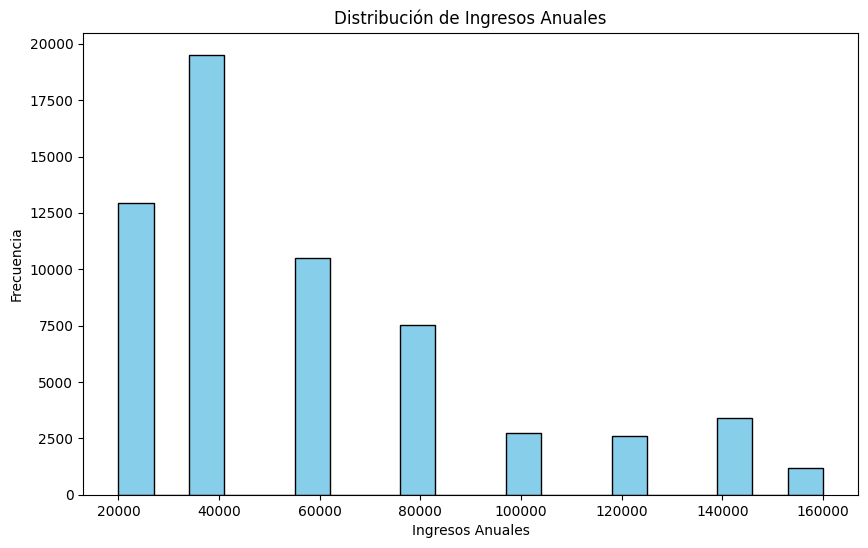

In [5]:
ingresos_anuales = df['ingreso_anual']

plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.hist(ingresos_anuales, bins=20, color='skyblue', edgecolor='black')  # Crea el histograma
plt.title('Distribución de Ingresos Anuales')
plt.xlabel('Ingresos Anuales')
plt.ylabel('Frecuencia')

plt.show()

Este gráfico muestra la relación entre los ingresos anuales, el género y el nivel de escolaridad:
En el siguiente se observa como el nivel de escolaridad varia ligeramente entre hombres y mujeres, se ve un mayor nivel de escolaridad Primaria, Superior y Maestria para los hombres; mientras que para las mujer hay un mayor nivel de escolaridad en el grado de Secundaria y Tecnico

<ipython-input-6-b0c035762480>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab10', len(niveles_escolaridad))


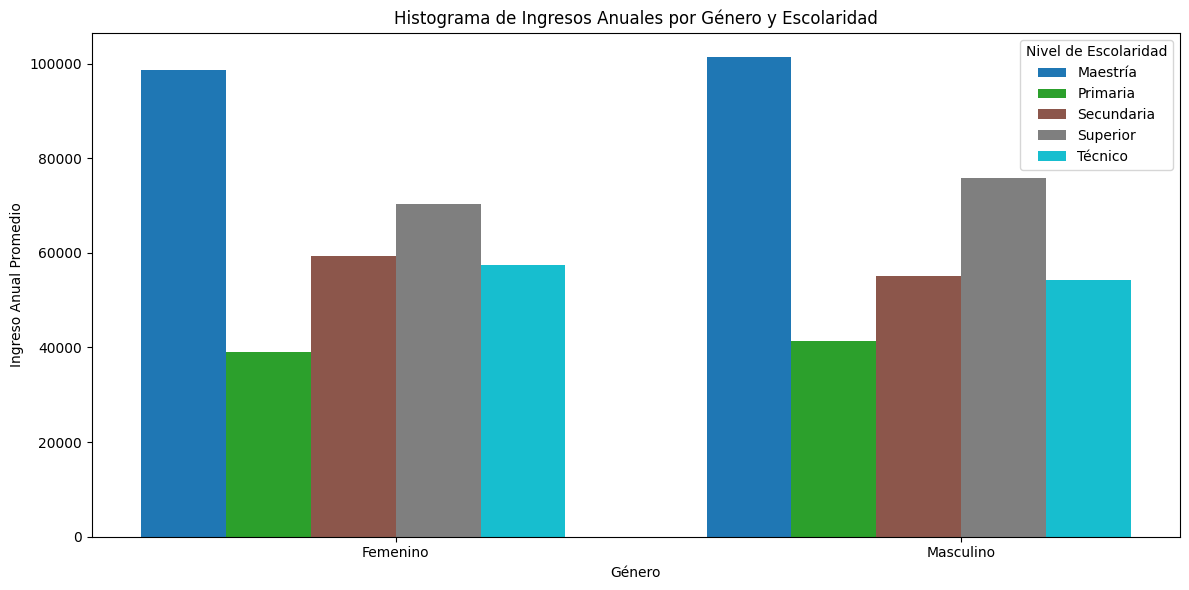

In [6]:
escolaridad_genero = df.groupby(['escolaridad', 'genero'])['ingreso_anual'].mean().reset_index()

# Obtener todos los niveles de escolaridad y sus colores
niveles_escolaridad = escolaridad_genero['escolaridad'].unique()
colores = plt.cm.get_cmap('tab10', len(niveles_escolaridad))

plt.figure(figsize=(12, 6))
bar_width = 0.15  # Ancho de las barras

for i, nivel in enumerate(niveles_escolaridad):
    datos_nivel = escolaridad_genero[escolaridad_genero['escolaridad'] == nivel]

    plt.bar(
        np.arange(len(datos_nivel)) + i * bar_width,
        datos_nivel['ingreso_anual'],
        width=bar_width,
        color=colores(i),
        label=nivel
    )

plt.xlabel('Género')
plt.ylabel('Ingreso Anual Promedio')
plt.title('Histograma de Ingresos Anuales por Género y Escolaridad')
plt.xticks(np.arange(len(datos_nivel)) + (len(niveles_escolaridad) / 2) * bar_width, datos_nivel['genero'])
plt.legend(title='Nivel de Escolaridad')
plt.tight_layout()
plt.show()

Proporción de Miembros y No Miembros por Estado Civil

Este gráfico de barras apiladas representa la proporción de miembros y no miembros en función del estado civil: En el se observa que es mayor la cantidad de personas casadas que adqieren el tipo de membresia Bronce

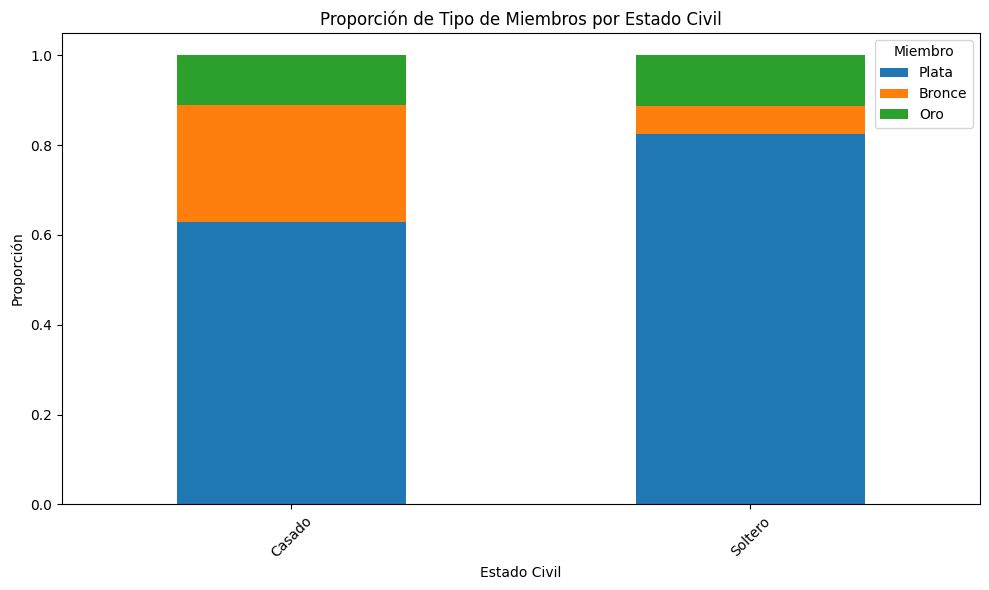

In [7]:
# Filtrar los datos por las columnas 'estado_civil' y 'miembro'
datos_estado_civil_miembro = df[['estado_civil', 'miembro']]

tabla_cruzada = pd.crosstab(datos_estado_civil_miembro['estado_civil'], datos_estado_civil_miembro['miembro'], normalize='index')

ax = tabla_cruzada.plot(kind='bar', stacked=True, figsize=(10, 6)) # Crear el gráfico de barras apiladas
plt.xlabel('Estado Civil')
plt.ylabel('Proporción')
plt.title('Proporción de Tipo de Miembros por Estado Civil')

etiquetas_legend = [str(label) for label in df['miembro'].unique() if pd.notna(label)]

plt.legend(title='Miembro', labels=etiquetas_legend)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Distribución de Ingreso Anual por Ocupación

Se utilizó un gráfico de violín para analizar la distribución de ingresos anuales según la ocupación:
En este se destacan varias observaciones:
1.- El limite de Ingreso anual que tienen los Tecnicos, Obreros y con Cargo de Oficina
2.- Potencia de ingresos anuales de personas que trabajan en lo Profesional y Gestion
3.- De cada Ocupacion se observa algo parecido a la moda en cuanto a Ingresos anuales

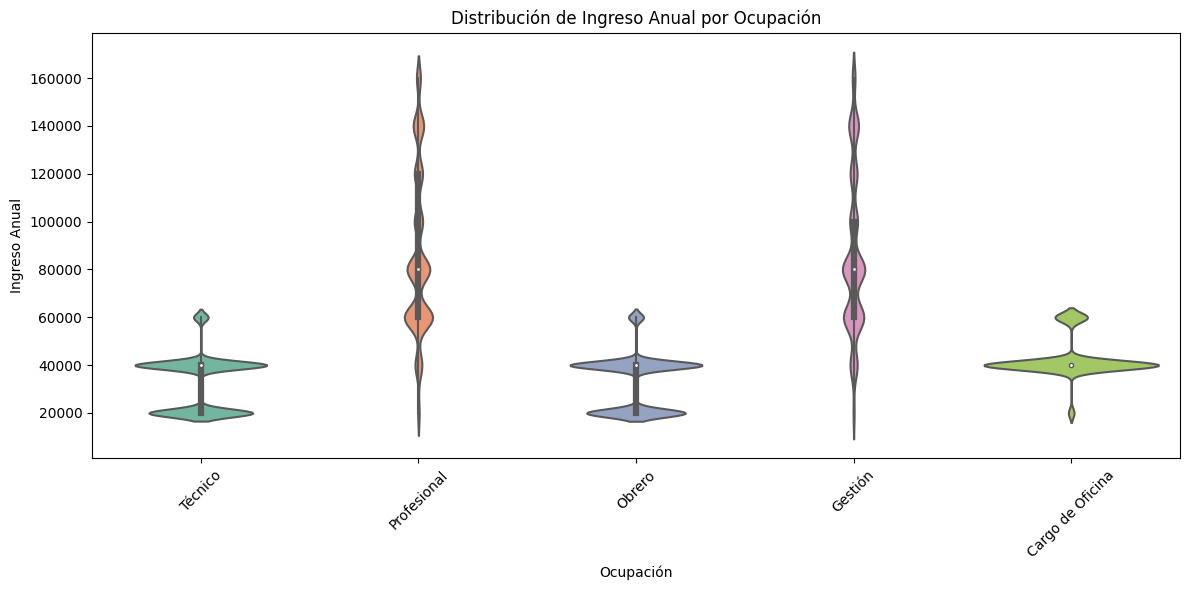

In [8]:
# Filtrar los datos por las columnas 'ocupacion' e 'ingreso_anual'
datos_ingreso_ocupacion = df[['ocupacion', 'ingreso_anual']]

plt.figure(figsize=(12, 6))
sns.violinplot(x='ocupacion', y='ingreso_anual', data=datos_ingreso_ocupacion, palette='Set2') # Crear el gráfico de violín
plt.xlabel('Ocupación')
plt.ylabel('Ingreso Anual')
plt.title('Distribución de Ingreso Anual por Ocupación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Preprocesamiento y Obtención de Features

In [36]:
# Obtener una lista de las columnas en el DataFrame
columnas = df.columns.tolist()

# Imprimir la lista de columnas
print("Columnas en el DataFrame:")
for columna in columnas:
    print(columna)


Columnas en el DataFrame:
categoria_alimento
departamento
tipo
ventas_tienda(en millones)
costo_tienda(en millones)
ventas_unitarias(en millones)
promocion
pais
estado_civil
genero
total_de_hijos
escolaridad
miembro
ocupacion
vivienda_propia
promedio_autos(aprox)
ingreso_anual
numero_hijos
promedio_autos(aprox)
marca
precio_recomendado
peso_bruto
peso_neto
empaque_reciclable
bajo_en_grasa
unidades_por_caja
comercio
ciudad
estado
pies_cuadrados_tienda
pies_cuadrados_comestibles
pies_cuadrados_congelados
pies_cuadrados_carne
cafeteria
tienda_de_videos
barra_de_ensaladas
comida_preparada
floristeria
divulgacion
costo


In [37]:
valores_unicos = df['pais'].unique()
print(valores_unicos)

['Estados Unidos' 'México' 'Canadá']


In [39]:
# Selecciona las columnas categóricas que deseas codificar
columnas_categoricas = [
    'categoria_alimento',
    'departamento',
    'tipo',
    'promocion',
    'pais',
    'estado_civil',
    'genero',
    'escolaridad',
    'miembro',
    'ocupacion',
    'vivienda_propia',
    'marca',
    'empaque_reciclable',
    'bajo_en_grasa',
    'comercio',
    'ciudad',
    'estado',
    'cafeteria',
    'tienda_de_videos',
    'barra_de_ensaladas',
    'comida_preparada',
    'floristeria',
    'divulgacion'
]

# Crear un diccionario personalizado para mapear valores originales a valores codificados
mapeo_personalizado = {
    'categoria_alimento': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['categoria_alimento'].unique())},
    'departamento': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['departamento'].unique())},
    'tipo': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['tipo'].unique())},
    'promocion': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['promocion'].unique())},
    'pais': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['pais'].unique())},
    'estado_civil': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['estado_civil'].unique())},
    'genero': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['genero'].unique())},
    'escolaridad': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['escolaridad'].unique())},
    'miembro': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['miembro'].unique())},
    'ocupacion': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['ocupacion'].unique())},
    'vivienda_propia': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['vivienda_propia'].unique())},
    'marca': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['marca'].unique())},
    'empaque_reciclable': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['empaque_reciclable'].unique())},
    'bajo_en_grasa': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['bajo_en_grasa'].unique())},
    'comercio': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['comercio'].unique())},
    'ciudad': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['ciudad'].unique())},
    'estado': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['estado'].unique())},
    'cafeteria': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['cafeteria'].unique())},
    'tienda_de_videos': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['tienda_de_videos'].unique())},
    'barra_de_ensaladas': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['barra_de_ensaladas'].unique())},
    'comida_preparada': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['comida_preparada'].unique())},
    'floristeria': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['floristeria'].unique())},
    'divulgacion': {valor_original: valor_codificado for valor_codificado, valor_original in enumerate(df['divulgacion'].unique())},
}

# Aplicar el mapeo personalizado a las columnas categóricas
for columna in columnas_categoricas:
    df[columna] = df[columna].map(mapeo_personalizado[columna])

# Imprimir el diccionario de mapeo personalizado
for columna, mapeo in mapeo_personalizado.items():
    print(f'Columna: {columna}')
    for valor_original, valor_codificado in mapeo.items():
        print(f'  Valor Original: {valor_original} -> Valor Codificado: {valor_codificado}')


Columna: categoria_alimento
  Valor Original: 0 -> Valor Codificado: 0
  Valor Original: 1 -> Valor Codificado: 1
  Valor Original: 2 -> Valor Codificado: 2
  Valor Original: 3 -> Valor Codificado: 3
  Valor Original: 4 -> Valor Codificado: 4
  Valor Original: 5 -> Valor Codificado: 5
  Valor Original: 6 -> Valor Codificado: 6
  Valor Original: 7 -> Valor Codificado: 7
  Valor Original: 8 -> Valor Codificado: 8
  Valor Original: 9 -> Valor Codificado: 9
  Valor Original: 10 -> Valor Codificado: 10
  Valor Original: 11 -> Valor Codificado: 11
  Valor Original: 12 -> Valor Codificado: 12
  Valor Original: 13 -> Valor Codificado: 13
  Valor Original: 14 -> Valor Codificado: 14
  Valor Original: 15 -> Valor Codificado: 15
  Valor Original: 16 -> Valor Codificado: 16
  Valor Original: 17 -> Valor Codificado: 17
  Valor Original: 18 -> Valor Codificado: 18
  Valor Original: 19 -> Valor Codificado: 19
  Valor Original: 20 -> Valor Codificado: 20
  Valor Original: 21 -> Valor Codificado: 21
  

In [20]:
# Supongamos que ya has cargado tu DataFrame desde un archivo CSV y tienes tus columnas categóricas seleccionadas
columnas_categoricas = [
    'categoria_alimento',
    'departamento',
    'tipo',
    # ... otras columnas ...
]

# Imprimir los valores únicos en cada columna categórica
for columna in columnas_categoricas:
    valores_unicos = df[columna].unique()
    print(f'Columna: {columna}')
    print('Valores Únicos:', valores_unicos)


Columna: categoria_alimento
Valores Únicos: [ 1 27 13 36 42 30 17  2 35  3 41 16 14 10 24 11 23 19 32 18 15 44 20 12
 40 33  8 22  7 39  4  5  0 31 38 29 28 37  6  9 21 34 26 43 25]
Columna: departamento
Valores Únicos: [ 0 16  1 18 15 21  3 17  4  5 20  9  6 13 11  7 14 12 19  2  8 10]
Columna: tipo
Valores Únicos: [1 2 0]
